**Underfitting and Overfitting**

Underfitting: It occurs when a machine learning model is too simple or lacks complexity to capture patterns in the training data. This results in poor fit to both training and validation data, indicating inadequate learning. To address underfitting, options include using more complex models, gathering more diverse training data, performing feature engineering, and fine-tuning hyperparameters.

Overfitting: When a machine learning model becomes excessively complex, fitting noise in the training data instead of true patterns. As a result, it performs well on training data but poorly on unseen data, failing to generalize. Solutions involve simplifying the model, increasing training data, utilizing regularization techniques, and optimizing hyperparameters to strike a better balance between complexity and generalization.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('/content/train[1].csv')

In [77]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


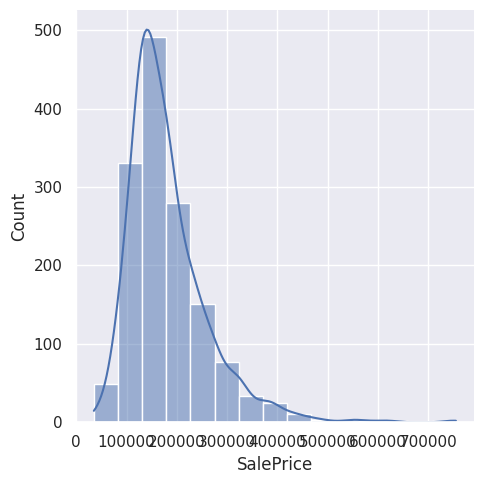

In [78]:
sns.set(rc=({'figure.figsize':(8,16)}))
sns.displot(df['SalePrice'], kde=True, bins=15)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

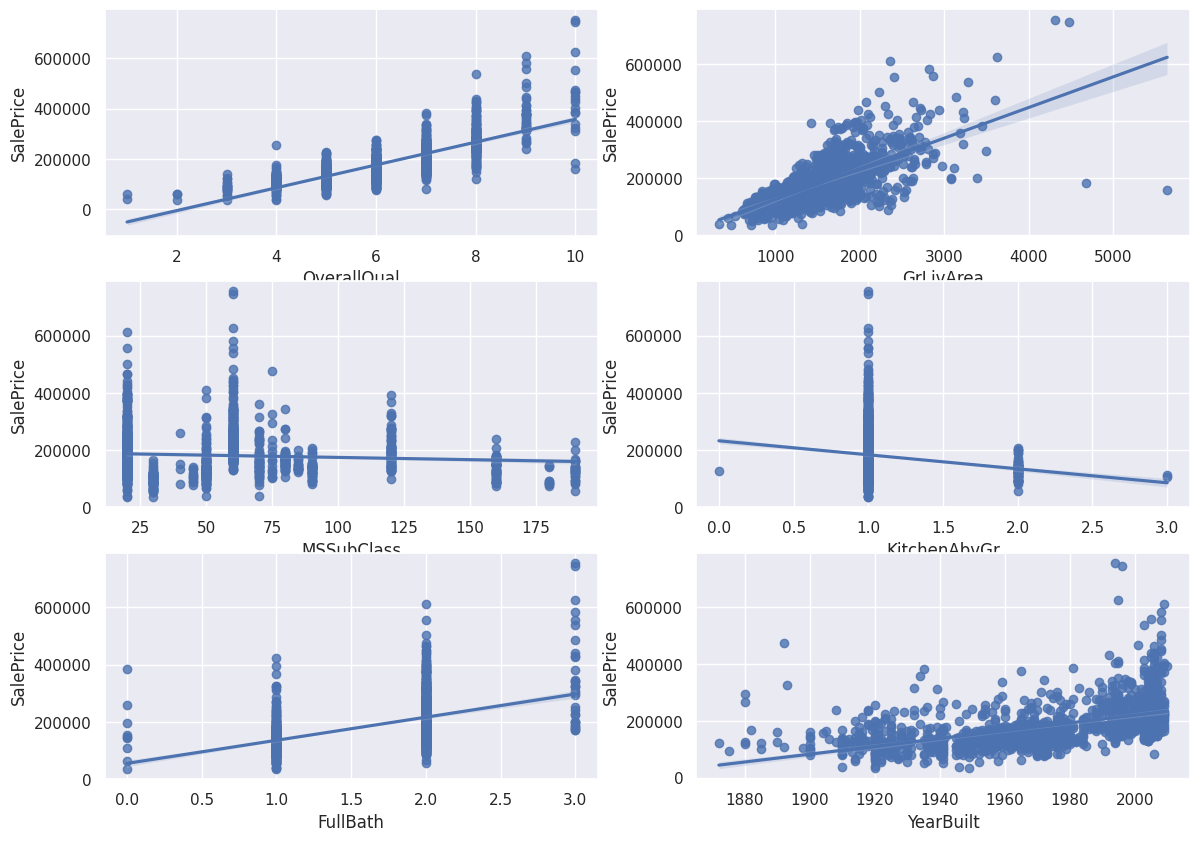

In [79]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
sns.regplot(x='OverallQual', y= 'SalePrice', data = df, scatter = True, fit_reg=True, ax=ax1)
sns.regplot(x='GrLivArea', y= 'SalePrice', data = df, scatter = True, fit_reg=True, ax=ax2)
sns.regplot(x='MSSubClass', y= 'SalePrice', data = df, scatter = True, fit_reg=True, ax=ax3)
sns.regplot(x='KitchenAbvGr', y= 'SalePrice', data = df, scatter = True, fit_reg=True, ax=ax4)
sns.regplot(x='FullBath', y= 'SalePrice', data = df, scatter = True, fit_reg=True, ax=ax5)
sns.regplot(x='YearBuilt', y= 'SalePrice', data = df, scatter = True, fit_reg=True, ax=ax6)

<Axes: xlabel='YearBuilt', ylabel='FullBath'>

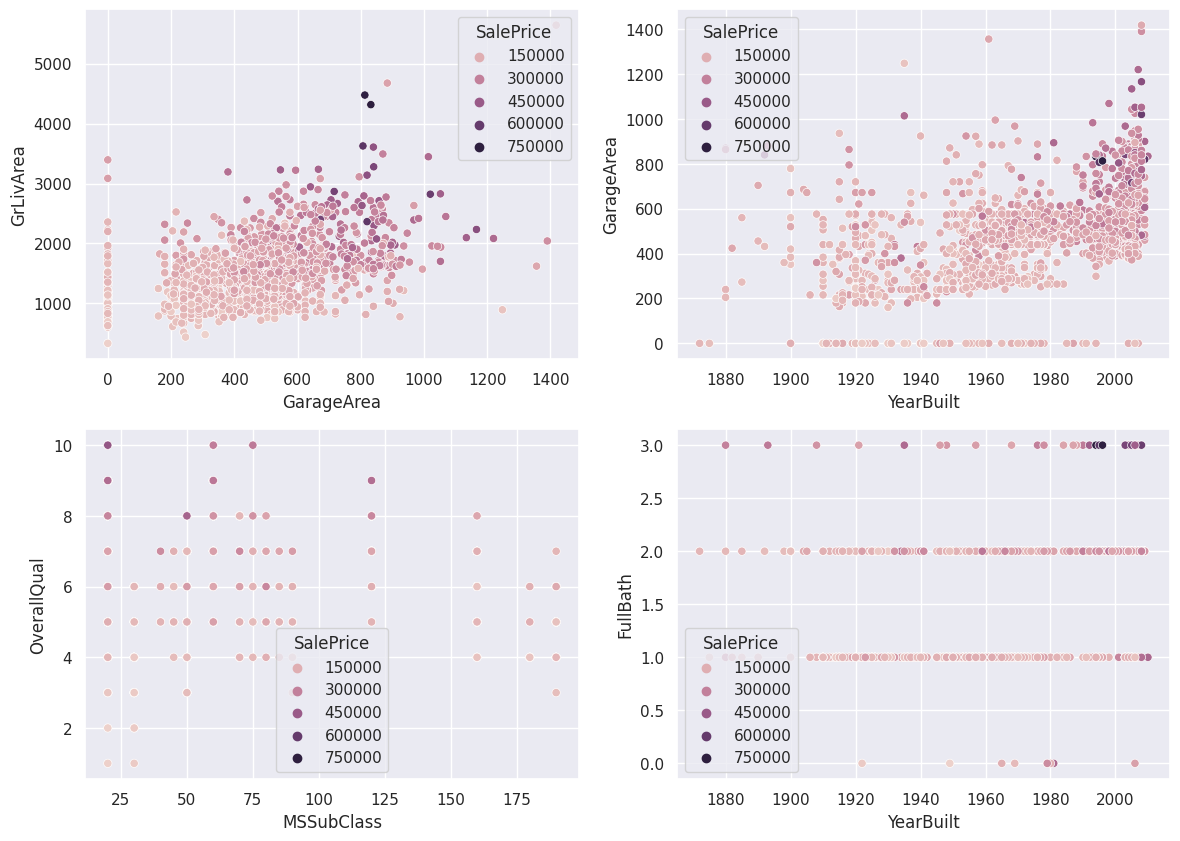

In [80]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.scatterplot(x='GarageArea', y='GrLivArea', data=df, hue='SalePrice', ax=ax1)
sns.scatterplot(x='YearBuilt', y='GarageArea', data=df, hue='SalePrice', ax=ax2)
sns.scatterplot(x='MSSubClass', y='OverallQual', data=df, hue='SalePrice', ax=ax3)
sns.scatterplot(x='YearBuilt', y='FullBath', data=df, hue='SalePrice', ax=ax4)

In [81]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

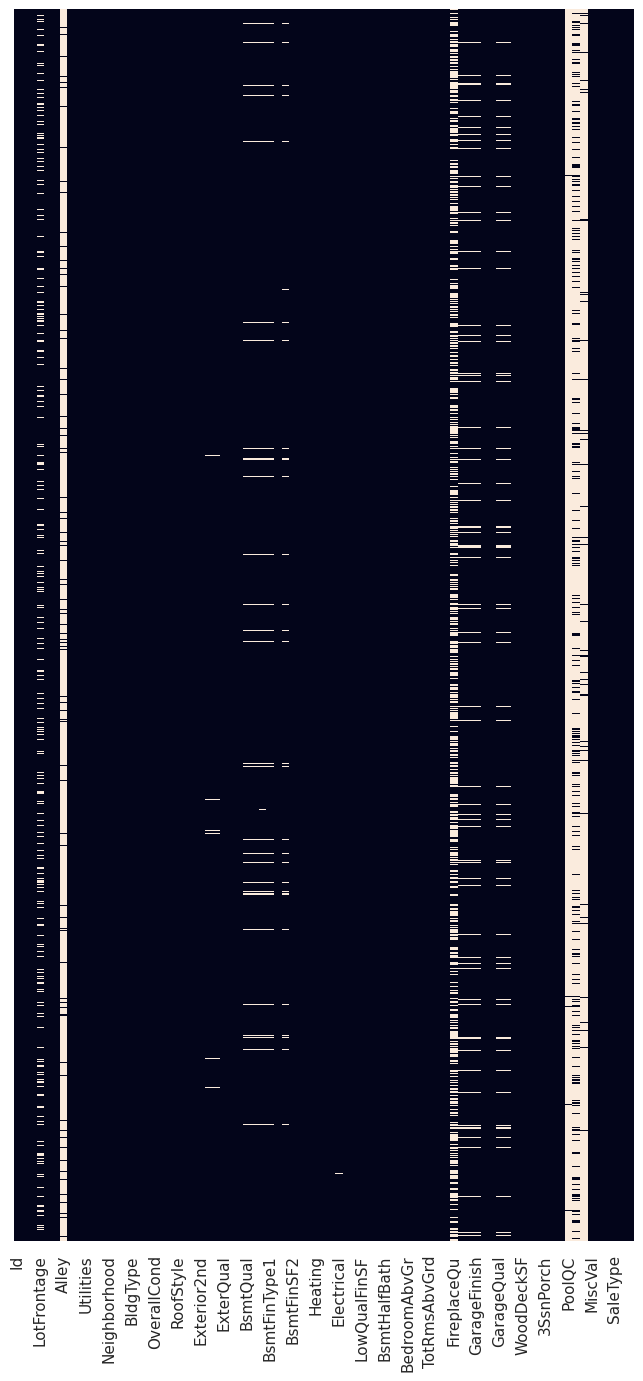

In [82]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [83]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [84]:
df.drop(['Alley'],axis=1, inplace=True)
df.drop(['GarageYrBlt'],axis=1, inplace=True)
df.drop(['PoolQC','Fence','MiscFeature'],axis=1, inplace=True)
df.drop(['Id'],axis=1, inplace=True)

In [85]:
numeric_features = df.select_dtypes(include=[np.number])

In [86]:
correlation = numeric_features.corr()

In [87]:
#we can see the top 15 features from back correlated with SalePrice feature
correlation['SalePrice'].sort_values(ascending=True).head(15)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
Name: SalePrice, dtype: float64

In [88]:
#we can see the top 15 features correlated with SalePrice feature
correlation['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
Name: SalePrice, dtype: float64

In [89]:
cols =['BsmtCond','BsmtQual','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType','MasVnrArea','Electrical','BsmtFinType1','BsmtFinType2','BsmtExposure']

In [90]:
#The function fills null values of categorical columns with it's mean
def fillna_with_mean(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])

In [91]:
df.isnull().sum().sum()

1218

In [92]:
#Call function
fillna_with_mean(df, cols)

In [93]:
df.isnull().sum().sum()

0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<Axes: >

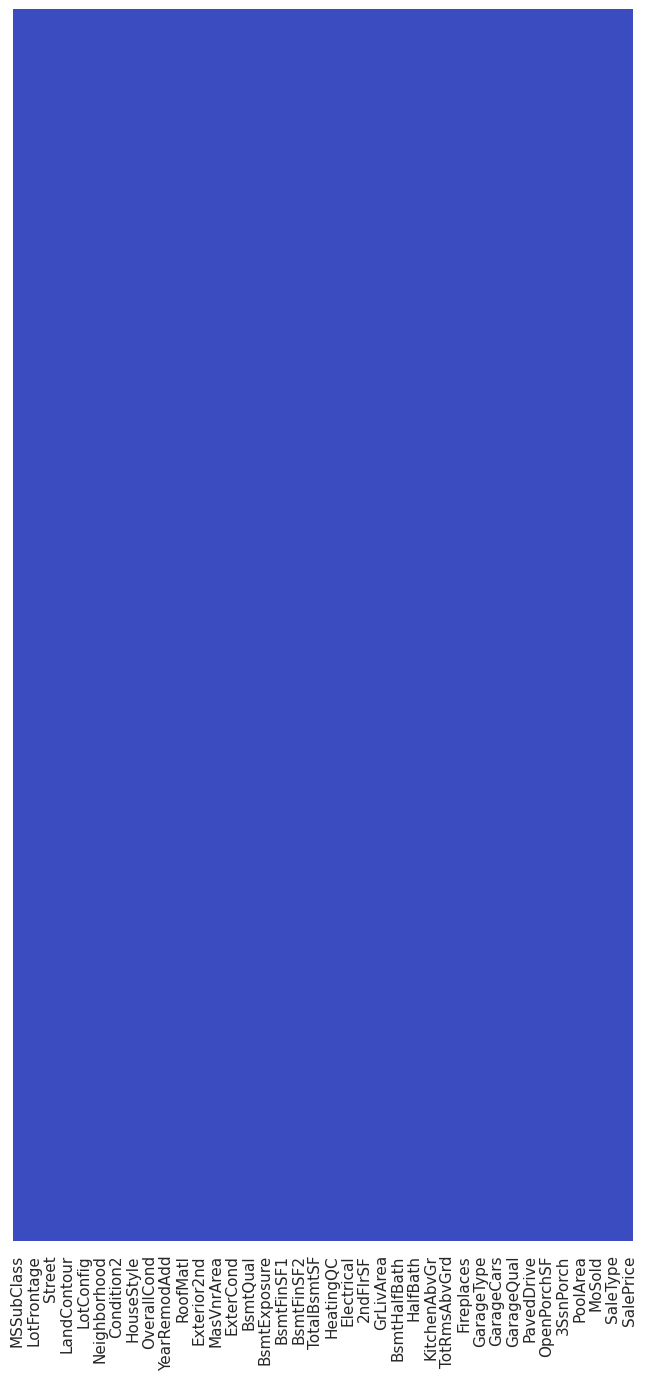

In [95]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [96]:
df.shape

(1460, 75)

In [97]:
#Find categorical features
columns = df.select_dtypes(include=['object']).columns.tolist()
columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [98]:
#The function which applies one hot encoding to all categorical features
def category_onehot_multcols(multcolumns):
  df_final=df
  i=0
  for fields in multcolumns:
    df1=pd.get_dummies(df[fields],drop_first=True)

    df.drop([fields],axis=1,inplace=True)
    if i==0:
      df_final=df1.copy()
    else:
      df_final=pd.concat([df_final,df1],axis=1)
    i=i+1
  df_final=pd.concat([df,df_final],axis=1)
  return df_final

In [99]:
final_df = category_onehot_multcols(columns)

In [100]:
final_df.shape

(1460, 236)

In [101]:
#Delete duplicated cols
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [102]:
final_df.shape

(1460, 176)

In [103]:
X = final_df.drop(['SalePrice'],axis=1)
y = final_df['SalePrice']

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Prediction with LinearRegression**

In [105]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model_LinearRegression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2


0.7007396838388034

In [107]:
model_LinearRegression.score(X_test,y_test)

0.7007396838388034

**Prediction with RandomForestRegressor**  

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
model_RandomForestRegressor = RandomForestRegressor(n_estimators=100, random_state=42)
model_RandomForestRegressor.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [110]:
y_pred_RFR = model_RandomForestRegressor.predict(X_test)
mse_randomForest = mean_squared_error(y_test, y_pred_RFR)
r2_randomForest = r2_score(y_test, y_pred_RFR)
r2_randomForest

0.8922592777597537

In [111]:
model_RandomForestRegressor.score(X_test,y_test)

0.8922592777597537

In [112]:
indisler = np.arange(len(y_test))

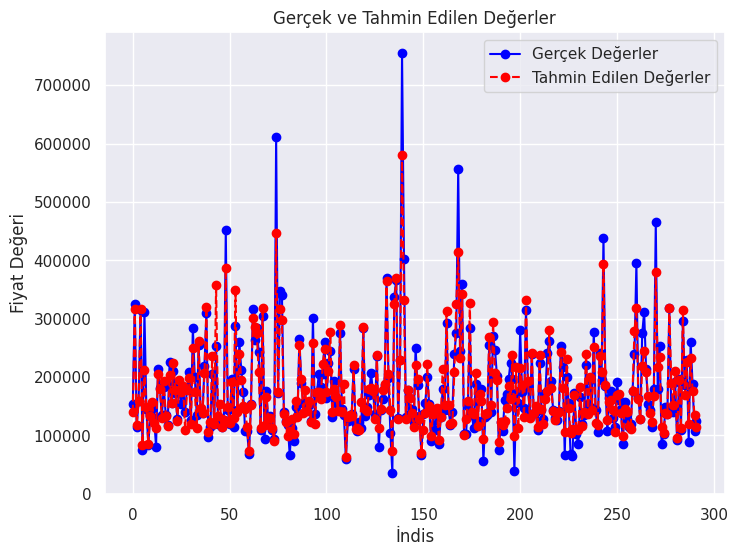

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(indisler, y_test, marker='o', color='blue', label='Gerçek Değerler')
plt.plot(indisler, y_pred_RFR, marker='o', color='red', linestyle='--', label='Tahmin Edilen Değerler')
plt.xlabel('İndis')
plt.ylabel('Fiyat Değeri')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()

**Prediction with Desicion Tree Regressor**

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
model_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=5)
model_DecisionTreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [116]:
y_pred = model_DecisionTreeRegressor.predict(X_test)
r2_DecisionTreeRegressor = r2_score(y_test, y_pred)
r2_DecisionTreeRegressor

0.7988209093359868

In [117]:
model_DecisionTreeRegressor.score(X_test,y_test)

0.7988209093359868

**Prediction with Support Vector Regression**

In [118]:
from sklearn.svm import SVR

In [119]:
model_SVR = SVR(kernel='linear')
model_SVR.fit(X_train, y_train)

SVR(kernel='linear')

In [120]:
y_pred = model_SVR.predict(X_test)
mse_SVR = mean_squared_error(y_test, y_pred)
r2_SVR = r2_score(y_test, y_pred)
r2_SVR

0.7895948042415083

In [121]:
model_SVR.score(X_test,y_test)

0.7895948042415083

**Prediction with kNN Regressor**

In [122]:
from sklearn.neighbors import KNeighborsRegressor

In [123]:
model_kNN = KNeighborsRegressor(n_neighbors=3)
model_kNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [124]:
y_pred = model_kNN.predict(X_test)
r2_kNN = r2_score(y_test, y_pred)
r2_kNN

0.7126318383654828

In [125]:
model_kNN.score(X_test,y_test)

0.7126318383654828

**Prediction with Gradient Boosting**

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

In [127]:
model_GradientBoostingRegressor = GradientBoostingRegressor(random_state=42)

In [128]:
model_GradientBoostingRegressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [129]:
y_pred = model_GradientBoostingRegressor.predict(X_test)
r2_GBR = r2_score(y_test, y_pred)
r2_GBR

0.8912442683405376

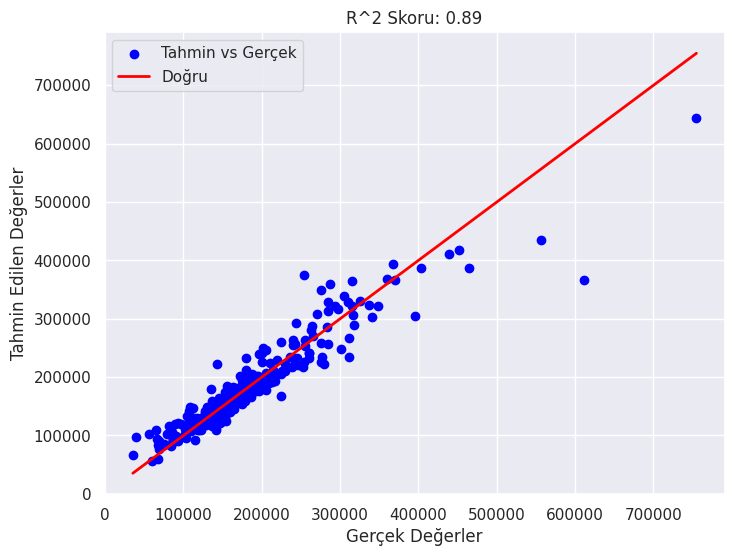

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahmin vs Gerçek')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2, label='Doğru')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title(f'R^2 Skoru: {r2_GBR:.2f}')
plt.legend()
plt.grid(True)
plt.show()